In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv(r"C:\Users\rufus\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [56]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [36]:
df["sales_channel"] = le.fit_transform(df.sales_channel)
df["trip_type"] = le.fit_transform(df.trip_type)
df["route"] = le.fit_transform(df.route)
df["booking_origin"] = le.fit_transform(df.booking_origin)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(3), int64(10)
memory usage: 4.8 M

In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
X.shape

(50000, 13)

In [44]:
y.shape

(50000,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 99)

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini",
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 5)

In [47]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [48]:
clf.feature_importances_

array([0.01627487, 0.01650551, 0.00248195, 0.05925369, 0.1098973 ,
       0.03393859, 0.01870187, 0.13444235, 0.3854613 , 0.04901831,
       0.02814053, 0.02098123, 0.12490249])

In [49]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [50]:
y_pred = clf.predict(X_test)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85152

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=10)

array([0.8504    , 0.85013333, 0.84986667, 0.85013333, 0.84986667,
       0.85013333, 0.85013333, 0.8504    , 0.85013333, 0.85013333])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12490
           1       0.00      0.60      0.01        10

    accuracy                           0.85     12500
   macro avg       0.50      0.73      0.46     12500
weighted avg       1.00      0.85      0.92     12500



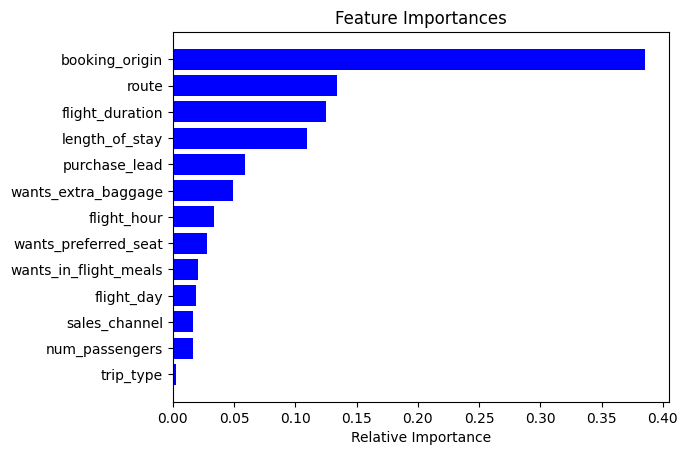

In [62]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

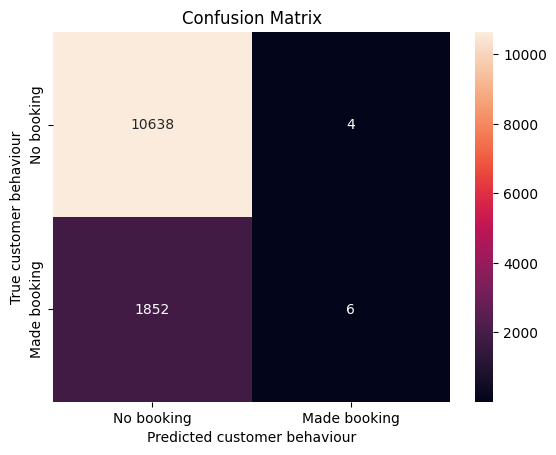

In [67]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted customer behaviour');ax.set_ylabel('True customer behaviour'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No booking', 'Made booking']); ax.yaxis.set_ticklabels(['No booking', 'Made booking']);